# Data preprocessing and library import

In [1]:
import pandas as pd
df=pd.read_csv("../data/MR_1.csv")

In [13]:
df.shape

(377580, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377580 entries, 0 to 377579
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       377580 non-null  float64
 1   y       377580 non-null  float64
 2   z       377580 non-null  float64
dtypes: float64(3)
memory usage: 8.6 MB


In [15]:
df.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [16]:
df.isna().sum()

x    0
y    0
z    0
dtype: int64

In [17]:
# as the data is clean it do not require pre processing

In [18]:
X = df
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,test_size=0.3,random_state=7)

In [19]:
X_train.shape, X_test.shape

((264306, 3), (113274, 3))

# How to decide right K in K means
### we use l-bow method
### We will plot inertia values for k=2 ... 10
####
Check in the graph where there is a sharp change (l-bow), this value of k is finalized

In [20]:
from sklearn.cluster import KMeans

In [21]:
inertia_values = []
for k in range(2,11):
    km = KMeans(n_clusters = k, random_state=7)
    km.fit(X_train)
    inertia_values.append(km.inertia_)

Matplotlib is building the font cache; this may take a moment.


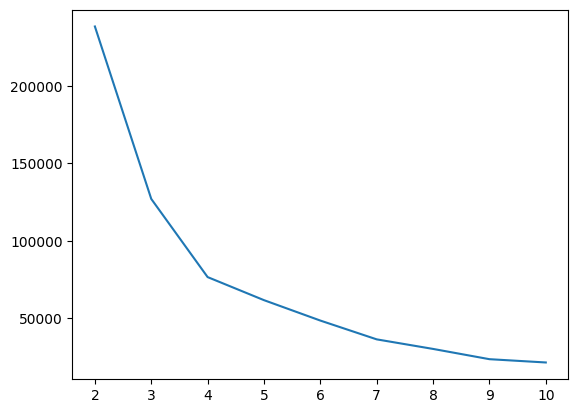

In [22]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), inertia_values)

# K mean algorithem

In [23]:
from sklearn.cluster import KMeans

In [24]:
mk = KMeans(3, max_iter=10000, random_state=3423)

In [25]:
mk.fit(X_train)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,10000
,tol,0.0001
,verbose,0
,random_state,3423
,copy_x,True
,algorithm,'lloyd'


In [26]:
y_pred = mk.predict(X_test)

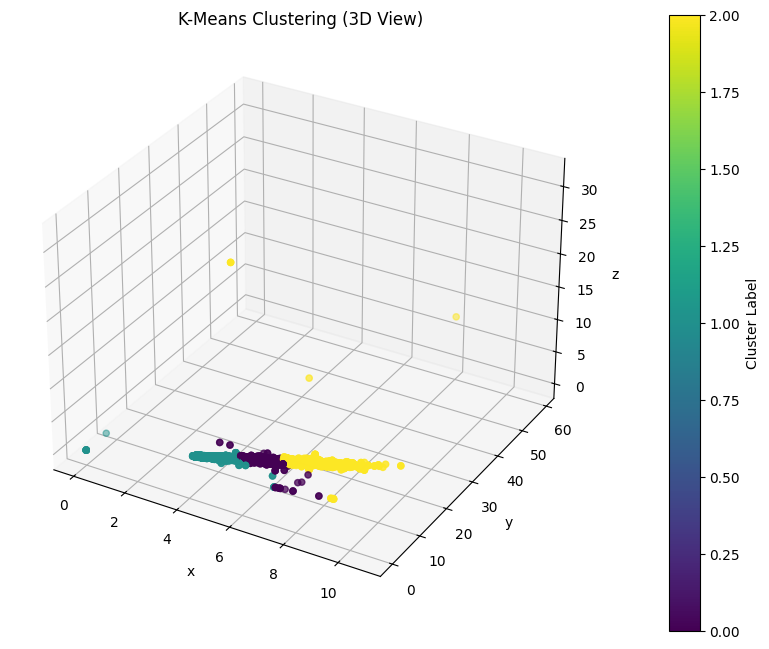

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test['x'], X_test['y'], X_test['z'], c=y_pred, cmap='viridis', s=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('K-Means Clustering (3D View)')

# Add a color bar to show cluster labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster Label')

plt.show()

In [28]:
from sklearn.metrics import silhouette_score
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm
silhouette_score(X_test, y_pred)

0.6020048775396533